In [1]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
import csv
import os

from statsmodels.stats.multicomp import MultiComparison

In [2]:
con = pymysql.connect(host="localhost", user="gabic", passwd="1234", db="doenca_renal_cronica")
con.select_db('doenca_renal_cronica')
cursor = con.cursor()  
cursor.connection.autocommit(True)

In [3]:
#criando os dataframes por tabela 
dados_consulta = pd.read_sql('SELECT * FROM doenca_renal_cronica.dados_consulta',con=con)
cidade = pd.read_sql('SELECT * FROM doenca_renal_cronica.cidade',con=con)
ubs = pd.read_sql('SELECT * FROM doenca_renal_cronica.ubs',con=con)
aval_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.aval_funcao_renal',con=con)
consulta_has = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_has',con=con)
consulta_drc = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_drc',con=con)
consulta_dm = pd.read_sql('SELECT * FROM doenca_renal_cronica.consulta_dm',con=con)
calculo_tfg = pd.read_sql('SELECT * FROM doenca_renal_cronica.calculo_tfg',con=con)
preparacao_trs = pd.read_sql('SELECT * FROM doenca_renal_cronica.preparacao_trs',con=con)
raca = pd.read_sql('SELECT * FROM doenca_renal_cronica.raca',con=con)
instrucao = pd.read_sql('SELECT * FROM doenca_renal_cronica.instrucao',con=con)
paciente = pd.read_sql('SELECT * FROM doenca_renal_cronica.paciente',con=con)
exame_fisico = pd.read_sql('SELECT * FROM doenca_renal_cronica.exame_fisico',con=con)
avaliacao_tratamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.avaliacao_tratamento',con=con)
medicamento = pd.read_sql('SELECT * FROM doenca_renal_cronica.medicamento',con=con)
complicacao_funcao_renal = pd.read_sql('SELECT * FROM doenca_renal_cronica.complicacao_funcao_renal',con=con)

#dicionario com todas tabelas
dic = {'dados_consulta':dados_consulta,'cidade':cidade,'ubs':ubs,'aval_funcao_renal':aval_funcao_renal,
       'consulta_has':consulta_has,'consulta_drc':consulta_drc,'consulta_dm':consulta_dm,'calculo_tfg':calculo_tfg,
       'preparacao_trs':preparacao_trs,'raca':raca,'instrucao':instrucao,'paciente':paciente,'exame_fisico':exame_fisico,
       'avaliacao_tratamento':avaliacao_tratamento,'medicamento':medicamento,'complicacao_funcao_renal':complicacao_funcao_renal
      }

In [4]:
correto={}
meses = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
for ind in range(len(dic['aval_funcao_renal']['id_afr'])):
    if dic['paciente']['data_nascimento'][ind]!='0.0':
        data_nascimento = dic['paciente']['data_nascimento'][ind].split('/')
        for i in range(len(meses)):
            if meses[i]==data_nascimento[1]:
                tam = len(meses[0:i])
        correto = str(1900+int(data_nascimento[2]))+'-'+str(tam+1)+'-'+data_nascimento[0]
        dic['paciente']['data_nascimento'][ind] = pd.to_datetime(correto)

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
#substituindo os valores para Nan 
for tabela in dic:
    for coluna in dic[tabela].keys():
        dic[tabela][coluna]=dic[tabela][coluna].replace([0,'0','0.0',''], np.nan)

In [6]:
for tabela in dic:
    for coluna in dic[tabela].keys():
        i_split = coluna.split('_')
        if i_split[0]=='id':
            dic[tabela]=dic[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='dt':
            dic[tabela]=dic[tabela].drop(columns=[coluna], errors='ignore')
        if i_split[0]=='total':
            dic[tabela]=dic[tabela].drop(columns=[coluna], errors='ignore')

In [7]:
#substituindo as string por int
#3a == 31
#3b == 32
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('1',1)
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('2',2)
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('3a',31)
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('3b',32)
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('4',4)
dic['dados_consulta']['estagioI']= dic['dados_consulta']['estagioI'].replace('5',5)

dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('1',1)
dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('2',2)
dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('3a',31)
dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('3b',32)
dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('4',4)
dic['dados_consulta']['estagioF']= dic['dados_consulta']['estagioF'].replace('5',5)

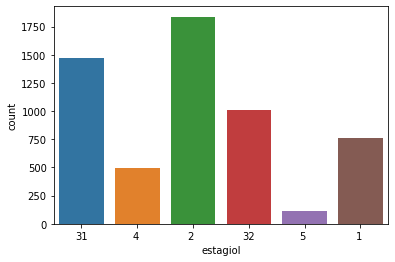

In [8]:
#estagioI quantidade de cada tipo de estagio
# os.mkdir('/home/gabic9814/git/DRC/count')
sns.countplot(x='estagioI', data= dic['dados_consulta'])
plt.savefig("count/count_estagioI")

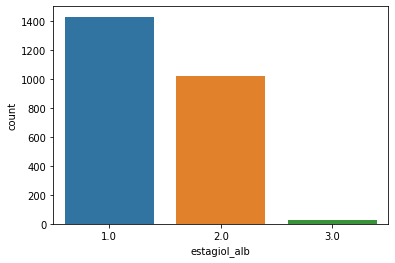

In [9]:
sns.countplot(x='estagioI_alb', data= dic['dados_consulta'])
plt.savefig("count/count_estagioI_alb")

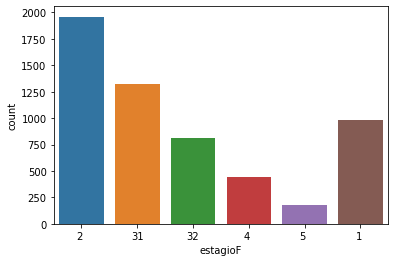

In [10]:
sns.countplot(x='estagioF', data= dic['dados_consulta'])
plt.savefig("count/count_estagioF")

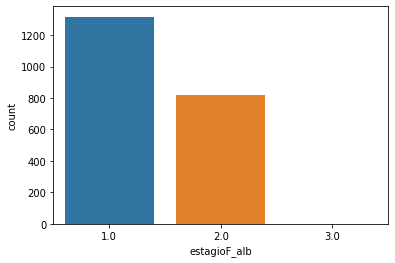

In [11]:
sns.countplot(x='estagioF_alb', data= dic['dados_consulta'])
plt.savefig("count/count_estagioF_alb")